<a href="https://colab.research.google.com/github/Himanshu-Gupta-Dev/ML/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


In [2]:
import pandas as pd

In [3]:
mov=pd.read_csv("movies.csv")

In [4]:
rat=pd.read_csv("ratings.csv")

#What is the shape of "movies.csv"?
*

In [6]:
mov.shape

(9742, 3)

#What is the shape of "ratings.csv"?


In [7]:
rat.shape

(100836, 4)

How many unique "userId" are available in "ratings.csv"?


In [8]:
rat['userId'].unique().shape

(610,)

In [12]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
rat.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Which movie has recieved maximum number of user ratings?


In [16]:
initial_value = 'matrix'

# Use str.contains to filter rows based on the initial value
filtered_data = mov[mov['title'].str.contains(initial_value)]

# Display the filtered data
print(filtered_data)


      movieId                  title                         genres
5669    27660  Animatrix, The (2003)  Action|Animation|Drama|Sci-Fi


In [22]:
rat[rat['movieId']==27660].count()

userId       20
movieId      20
rating       20
timestamp    20
dtype: int64

In [8]:
initial_value = 'Forrest Gump'

# Use str.contains to filter rows based on the initial value
filtered_data = mov[mov['title'].str.contains(initial_value)]

# Display the filtered data
print(filtered_data)

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [10]:
initial_value = 'Shawshank Redemption'

# Use str.contains to filter rows based on the initial value
filtered_data = mov[mov['title'].str.contains(initial_value)]

# Display the filtered data
print(filtered_data)

     movieId                             title       genres
277      318  Shawshank Redemption, The (1994)  Crime|Drama


In [11]:
rat[rat['movieId']==318].count()

userId       317
movieId      317
rating       317
timestamp    317
dtype: int64

In [9]:
rat[rat['movieId']==356].count()

userId       329
movieId      329
rating       329
timestamp    329
dtype: int64

In [12]:
tag=pd.read_csv("tags.csv")

#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
mov[mov['title']== "Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


AS the ID is 2571 we Will get the tags with the help if tag.csv file


In [15]:
tag[tag['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
mov[mov['title']== "Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [18]:
rat[rat['movieId']==589]['rating'].mean()

3.970982142857143

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [24]:
fight_club_ratings=rat[rat['movieId']==2959]

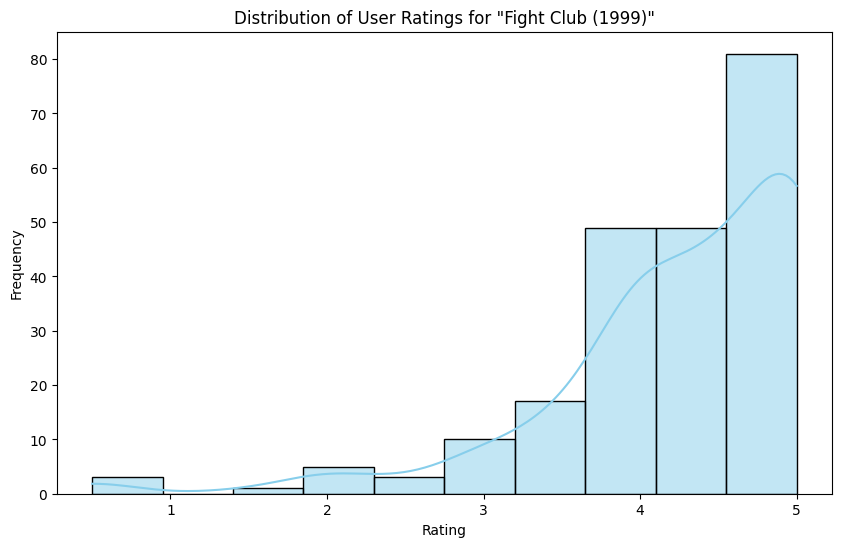

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

A we can SEe it is left screwed

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [26]:
import pandas as pd


ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# 1. Group user ratings based on movieId and apply aggregation operations
ratings_grouped = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# 3. Filter only those movies which have more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Display the resulting DataFrame
print(filtered_data.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [27]:
filtered_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


#Which movie is the most popular based on  average user ratings?
*

In [30]:

max_mean_rating_row = filtered_data.loc[filtered_data['rating_mean'].idxmax()]

# Print the entire row
print("Movie with Maximum Mean Rating:")
print(max_mean_rating_row)


Movie with Maximum Mean Rating:
movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object


#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [31]:


# Sort the DataFrame by 'rating_count' in descending order
top_movies_by_ratings = filtered_data.sort_values(by='rating_count', ascending=False)

# Select the top 5 movies
top_5_movies = top_movies_by_ratings.head(5)

# Display the top 5 movies
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_movies[['title', 'rating_count']])


Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [32]:
# Filter for Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by 'rating_count' in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Retrieve the third row (index 2 since indexing starts from 0)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the information about the third most popular Sci-Fi movie
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])


Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Assuming you have 'filtered_data' DataFrame and 'links.csv' file available

# Load 'links.csv' file
links = pd.read_csv('links.csv')

# Merge 'filtered_data' with 'links' to get IMDb IDs
merged_data_with_links = pd.merge(filtered_data, links, on='movieId', how='inner')

# Function to scrape IMDb reviews for a given IMDb ID
def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/reviews?ref_=tt_ql_3'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract reviews using BeautifulSoup
        reviews = soup.find_all('div', class_='text show-more__control')
        return [review.text.strip() for review in reviews]
    else:
        print(f"Failed to fetch reviews for IMDb ID {imdb_id}")
        return []

# Scrape IMDb reviews for each movie with more than 50 user ratings
for index, row in merged_data_with_links.iterrows():
    imdb_id = row['imdbId']
    movie_title = row['title']
    reviews = scrape_imdb_reviews(imdb_id)

    # Do something with the reviews (e.g., save to a file or analyze them)
    # For now, let's just print the movie title and reviews count
    print(f"Movie: {movie_title}, Reviews Count: {len(reviews)}")


Failed to fetch reviews for IMDb ID 114709
Movie: Toy Story (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 113497
Movie: Jumanji (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 113228
Movie: Grumpier Old Men (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 113277
Movie: Heat (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 114319
Movie: Sabrina (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 113189
Movie: GoldenEye (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 112346
Movie: American President, The (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 112641
Movie: Casino (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 114388
Movie: Sense and Sensibility (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 112281
Movie: Ace Ventura: When Nature Calls (1995), Reviews Count: 0
Failed to fetch reviews for IMDb ID 113161
Movie: Get Shorty (1995), Reviews Count: 0
Failed to fetch review

#Mention the movieId of the movie which has the highest IMDB rating.


In [35]:
# Find the movie with the highest IMDb rating
highest_imdb_rating_movie = filtered_data.loc[filtered_data['rating_mean'].idxmax()]

# Get the movieId of the movie with the highest IMDb rating
highest_imdb_rating_movie_id = highest_imdb_rating_movie['movieId']

# Print the movieId
print("MovieId of the Movie with the Highest IMDb Rating:", highest_imdb_rating_movie_id)


MovieId of the Movie with the Highest IMDb Rating: 318


#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [36]:
# Filter for Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest IMDb rating
highest_imdb_rating_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating_mean'].idxmax()]

# Get the movieId of the Sci-Fi movie with the highest IMDb rating
highest_imdb_rating_sci_fi_movie_id = highest_imdb_rating_sci_fi_movie['movieId']

# Print the movieId
print("MovieId of the Sci-Fi Movie with the Highest IMDb Rating:", highest_imdb_rating_sci_fi_movie_id)


MovieId of the Sci-Fi Movie with the Highest IMDb Rating: 260
